In [4]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Datos de Diabetes
datos_diabetes = pd.read_csv('/home/juan/machineLearning2025/datasets/diabetes_012_health_indicators_BRFSS2015.csv')

datos_diabetes

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


Información de los datos:
Dataset de origen

El Sistema de VIgilancia de Factores de Riesgo en el Comportamiento (BRFSS) se encarga de realizar encuestas telefónicas relacionadas con la salud de los residentes de EE.UU., relativos a sus comportamientos de riesgos para su salud, como lo son enfermedades crónicas, hábitos de preveención de enfermedades y uso de servicios de salud. 

https://www.cdc.gov/brfss/annual_data/annual_data.htm


El dataset usado para este proyecto 1toma deatos de la fuente anterior, especificamente del 2015, y selecciona 22 caracteristicas para estudiar la diabetes en los residentes de EE.UU.

https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset

https://www.kaggle.com/code/alexteboul/diabetes-health-indicators-dataset-notebook

Dataset desbalanceado. 22 variables. Variaable predictora: diabetes.

Diabetes_012 -> 0 no diabetes, 1 prediabetes, 2 diabetes. Varliable Categórica.

HighBP-> Hipertension. Variable Boolena.

HighChol -> COlesterol alto. Variable Booleana.

CholCheck-> Chequeo de colesterol los ultimos 5 años. Variable Booleana.

BMI -> Indice de masa corporal. Variable discreta.

Smoker ->Ha fumado al menos 100 cigarrros en su vida. Variable booleana.

Stroke -> Derrame cerebral. Variable booleana.

HeartDiseaseorAttack -> infarto coronario o infarto al miocardio. Variable booleana.

PhysActivity -> Actividad fisica los ultimos 30 dias. Variable booleana.

Fruits -> Consume al menos 1 fruta al dia. Variable booleana.

Veggies -> Consume vegetales al menos 1 vez al dia. Variable booleana.

HvyAlcoholConsump -> Hombres que toman mas de 14 bebidas alcoholicas por semana, mujeres mas de 7. Variable booleana.

AnyHealthcare-> Tiene algun seguro médico. Variable booleana.

NoDocbcCost-> En el ultimo año, no visito a un doctor debido a no poder costear los servicios médicos. Variable booleana.

GenHlth -> Opinion de salud general, tu salud general es? Escala 1-5. Variable categórica.

MentHlth -> Por cuantos dias durante el ultimo mes (1-30) no tuviste una salud buena?. Variable categórica. 

PhysHlth -> Por cuantos dias durante el ultimo mes (1-30) tu salud no fue buena?. Variable categórica.

DiffWalk -> TIenes dificultades para caminar o subir escaleras?. Variable booleana.

Sex -> 0=Femenino, 1= Masculino. Variable boolena.

Age ->  escala del 1-13, 1= 18-24, 2=25-29, 3=30-34, 4=35-39, 5=40-44, 6=45-49, 7=50-54 , 8=55-59 , 9=60-64, 10= 65-69, 11= 70-74, 12=75-79 ,13=80 o mayores. Variable categórica.

Education -> escala del 1-6, 1=nunca fue a la escuela o solo kinder, 2=grados 1-8, 3= grados 9-11, 4= grado 12 o graduados de HIgh school, 5= 1-3 de universidad, 6= 4 o mas a;os de universidad. Variable categórica.

Income -> escala 1-8 1= menos de 10,000, 5= menos de 35,000, 8=75,000 o más. Variable categórica.


Objetivo de trabajar con este dataset:


* ¿Cuáles son las variables más importantes para porder clasificar a los pacientes respecto a riesgo de  diabetes?

* ¿La información recopilada por la BRFSS puede clasificar pacientes con diabetes y pacientes sanos ?




In [6]:
#Crear la columna diabetes_01 que unifique prediabetes con diabetes
datos_diabetes['diabetes_01'] = datos_diabetes['Diabetes_012']
datos_diabetes['diabetes_01'] = datos_diabetes['diabetes_01'].replace(2,1)

#datos_diabetes = datos_diabetes.rename(columns={'Diabetes_012':'diabetes'})

In [7]:
datos_diabetes.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'diabetes_01'],
      dtype='object')

In [8]:
#Reparar nombres de columnas. Se usa el formato loweCamelCase para el nombre de las caracteristicas.

new_col_names = []

for name in datos_diabetes.columns:
    # Luego, pon todas las letras en minúsculas
    name_lowered_first_letter = name[0].lower() + name[1:]
    # Elimina los espacios al principio y al final
    name_stripped = name_lowered_first_letter.strip()
    # Por último, reemplaza los espacios entre palabras por guiones bajos
    name_no_spaces = name_stripped.replace(' ', '_')
    # Agrega el nuevo nombre a la lista de nuevos nombres de columna
    new_col_names.append(name_no_spaces)

datos_diabetes.columns = new_col_names

datos_diabetes = datos_diabetes.rename(columns={'bMI':'bmi'})

datos_diabetes.columns


Index(['diabetes_012', 'highBP', 'highChol', 'cholCheck', 'bmi', 'smoker',
       'stroke', 'heartDiseaseorAttack', 'physActivity', 'fruits', 'veggies',
       'hvyAlcoholConsump', 'anyHealthcare', 'noDocbcCost', 'genHlth',
       'mentHlth', 'physHlth', 'diffWalk', 'sex', 'age', 'education', 'income',
       'diabetes_01'],
      dtype='object')

In [9]:
# mostrar información del DataFrame
def info(df):
    print('Duplicated: ',df.duplicated().sum())
    print('% Duplicated: ',100* df.duplicated().sum() /len(df))
    print('Null values %:')
    print(100*df.isnull().sum()/len(df))

info(datos_diabetes)

Duplicated:  23899
% Duplicated:  9.420923998738568
Null values %:
diabetes_012            0.0
highBP                  0.0
highChol                0.0
cholCheck               0.0
bmi                     0.0
smoker                  0.0
stroke                  0.0
heartDiseaseorAttack    0.0
physActivity            0.0
fruits                  0.0
veggies                 0.0
hvyAlcoholConsump       0.0
anyHealthcare           0.0
noDocbcCost             0.0
genHlth                 0.0
mentHlth                0.0
physHlth                0.0
diffWalk                0.0
sex                     0.0
age                     0.0
education               0.0
income                  0.0
diabetes_01             0.0
dtype: float64


Se mantienen los duplicados, ya que cada registro es una llamada a un residente de USA, y ninguna columna es de valores únicos.


In [10]:
datos_diabetes.describe()

,diabetes_012,highBP,highChol,cholCheck,bmi,smoker,stroke,heartDiseaseorAttack,physActivity,fruits,...,noDocbcCost,genHlth,mentHlth,physHlth,diffWalk,sex,age,education,income,diabetes_01
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875,0.157588
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148,0.364355
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000,0.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000,0.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,1.000000


In [11]:
#Definicion de datos enteros.
#datos_diabetes[['diabetes', 'GenHlth', 'MentHlth', 'PhysHlth', 'BMI', 'Age', 'Education', 'Income' ]] = datos_diabetes[['diabetes', 'GenHlth', 'MentHlth', 'PhysHlth', 'BMI', 'Age', 'Education', 'Income']].astype(int)

#Definicion de datos enteros.
for col in datos_diabetes.columns:
    #if datos_diabetes[col].dtype == 'float64':
    datos_diabetes[col] = datos_diabetes[col].astype(int)


#Ver balanceo de la clase objetivo. Diabetes_012
porcentaje = 100*datos_diabetes['diabetes_01'].value_counts()/len(datos_diabetes)
print(porcentaje.astype(str) + '%')

diabetes_01
0     84.24116997792494%
1    15.758830022075054%
Name: count, dtype: object


In [12]:
datos_diabetes.describe()

,diabetes_012,highBP,highChol,cholCheck,bmi,smoker,stroke,heartDiseaseorAttack,physActivity,fruits,...,noDocbcCost,genHlth,mentHlth,physHlth,diffWalk,sex,age,education,income,diabetes_01
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875,0.157588
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148,0.364355
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000,0.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000,0.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,1.000000


/tmp/ipykernel_13326/934269334.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['Femenino', 'Masculino'])


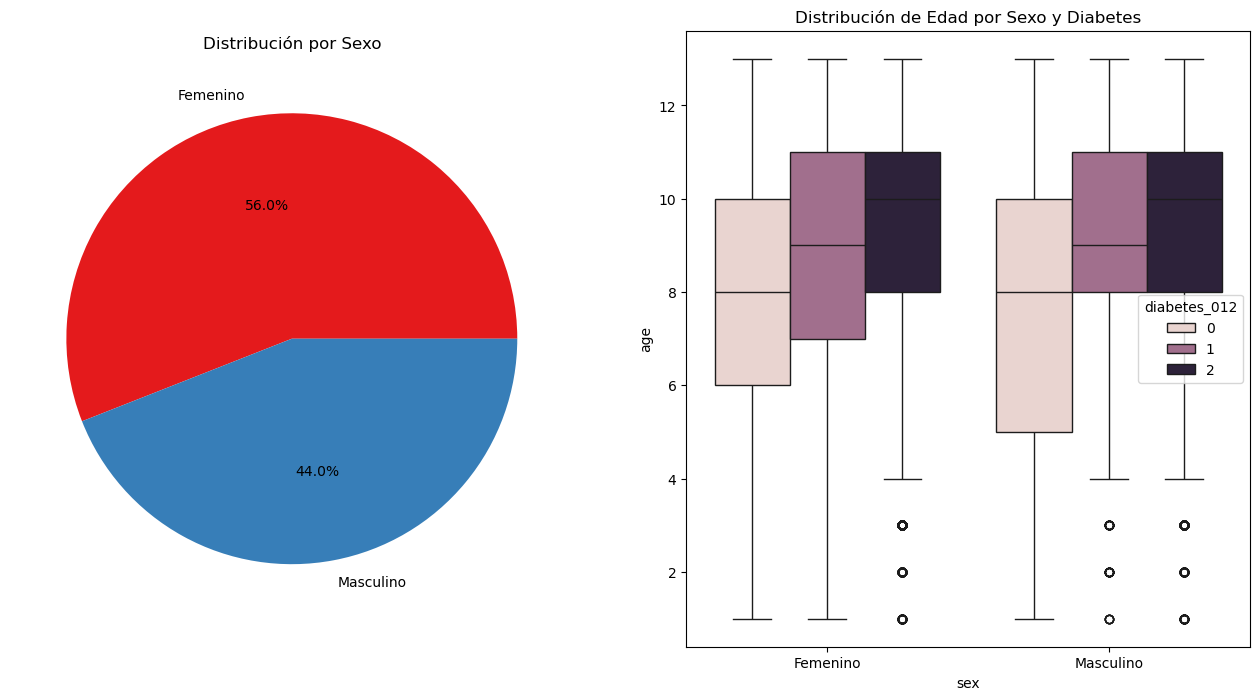

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

sexo_counts = datos_diabetes['sex'].value_counts()
sexo_labels = {1: "Masculino", 0: "Femenino"}
sexo_counts.index = sexo_counts.index.map(sexo_labels)

axes[0].pie(sexo_counts, labels=sexo_counts.index, autopct='%1.1f%%', 
            colors=sns.color_palette('Set1', len(sexo_counts)))
axes[0].set_title('Distribución por Sexo')

#Gráficas de cajas
sns.boxplot(data=datos_diabetes, x='sex', y='age', hue='diabetes_012', ax=axes[1])
axes[1].set_title('Distribución de Edad por Sexo y Diabetes')
axes[1].set_xticklabels(['Femenino', 'Masculino'])

plt.show()

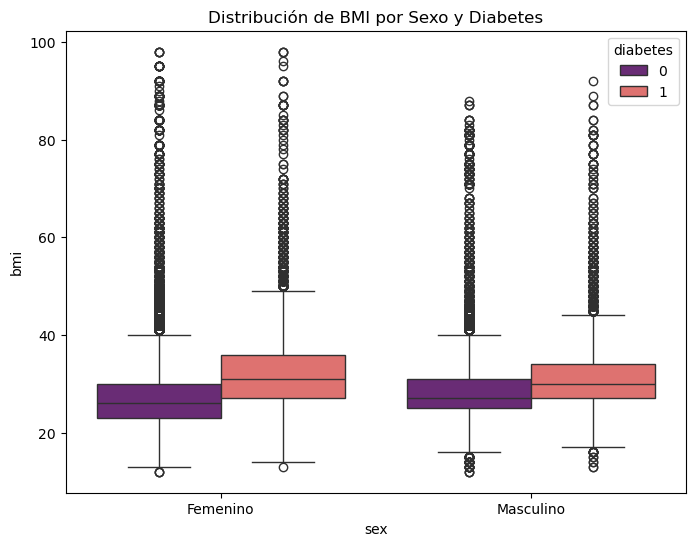

In [14]:

plt.figure(figsize=(8, 6))
sexo_labels = {1: "Masculino", 0: "Femenino"}
sns.boxplot(x='sex', y='bmi', hue='diabetes_01', data=datos_diabetes, palette='magma')

# Ajustar los títulos y etiquetas

plt.title('Distribución de BMI por Sexo y Diabetes')
plt.xlabel('sex')
plt.xticks(ticks=range(len(sexo_labels)), labels=[sexo_labels[sex] for sex in sorted(sexo_labels.keys())])
plt.ylabel('bmi')

# Mostrar la gráfica
plt.legend(title='diabetes')

     5.0%  25.0%  50.0%  75.0%  95.0%
bmi  20.0   24.0   27.0   31.0   40.0
Porcentaje del total: 0.34216335540838855 %


,diabetes_012,highBP,highChol,cholCheck,bmi,smoker,stroke,heartDiseaseorAttack,physActivity,fruits,...,noDocbcCost,genHlth,mentHlth,physHlth,diffWalk,sex,age,education,income,diabetes_01
0,0,1,1,1,40,1,0,0,0,0,...,0,5,18,15,1,0,9,4,3,0
1,0,0,0,0,25,1,0,0,1,0,...,1,3,0,0,0,0,7,6,1,0
2,0,1,1,1,28,0,0,0,0,1,...,1,5,30,30,1,0,9,4,8,0
3,0,1,0,1,27,0,0,0,1,1,...,0,2,0,0,0,0,11,3,6,0
4,0,1,1,1,24,0,0,0,1,1,...,0,2,3,0,0,0,11,5,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0,1,1,1,45,0,0,0,0,1,...,0,3,0,5,0,1,5,6,7,0
253676,2,1,1,1,18,0,0,0,0,0,...,0,4,0,0,1,0,11,2,4,1
253677,0,0,0,1,28,0,0,0,1,1,...,0,1,0,0,0,0,2,5,2,0
253678,0,1,0,1,23,0,0,0,0,1,...,0,3,0,0,0,1,7,5,1,0


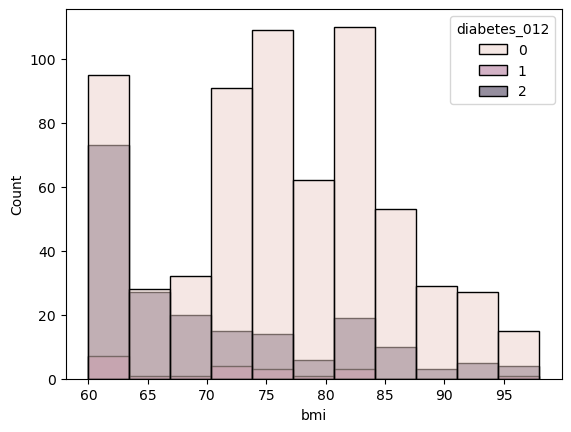

In [15]:
percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
df = pd.DataFrame(datos_diabetes['bmi'].quantile(percentages)) #calcular los cuantiles
df.index = [f'{p * 100}%' for p in percentages] 
print(df.transpose())

df_bmi_60 = datos_diabetes[datos_diabetes['bmi']>=60]
df_bmi_60
##Grafica de frecuencias para bmi mayor a 60


sns.histplot(data=df_bmi_60, x='bmi', hue='diabetes_012', kde=False) #bins=k, ax=axes[i], multiple='stack')

print(f'Porcentaje del total: {len(df_bmi_60)/len(datos_diabetes)*100} %')

datos_diabetes

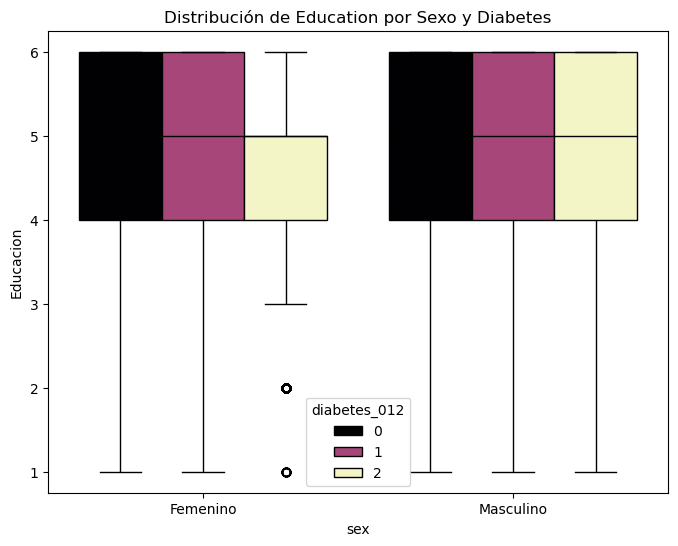

In [16]:

plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='education', hue='diabetes_012', data=datos_diabetes, palette='magma')

# Ajustar los títulos y etiquetas
plt.title('Distribución de Education por Sexo y Diabetes')
plt.xlabel('sex')
plt.xticks(ticks=range(len(sexo_labels)), labels=[sexo_labels[sex] for sex in sorted(sexo_labels.keys())])
plt.ylabel('Educacion')

# Mostrar la gráfica
plt.legend(title='diabetes_012')

La mayoria de los pacientes tienen al menos el nivel de HIgh School.

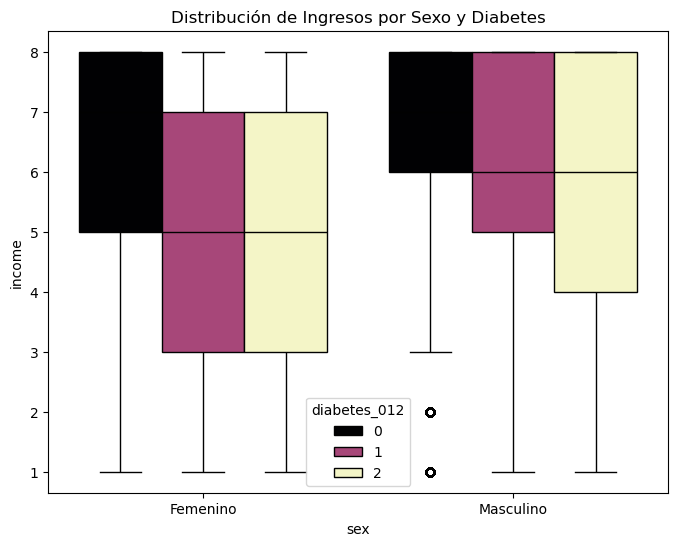

In [17]:

plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='income', hue='diabetes_012', data=datos_diabetes, palette='magma')

# Ajustar los títulos y etiquetas
plt.title('Distribución de Ingresos por Sexo y Diabetes')
plt.xlabel('sex')
plt.xticks(ticks=range(len(sexo_labels)), labels=[sexo_labels[sex] for sex in sorted(sexo_labels.keys())])
plt.ylabel('income')

# Mostrar la gráfica
plt.legend(title='diabetes_012')

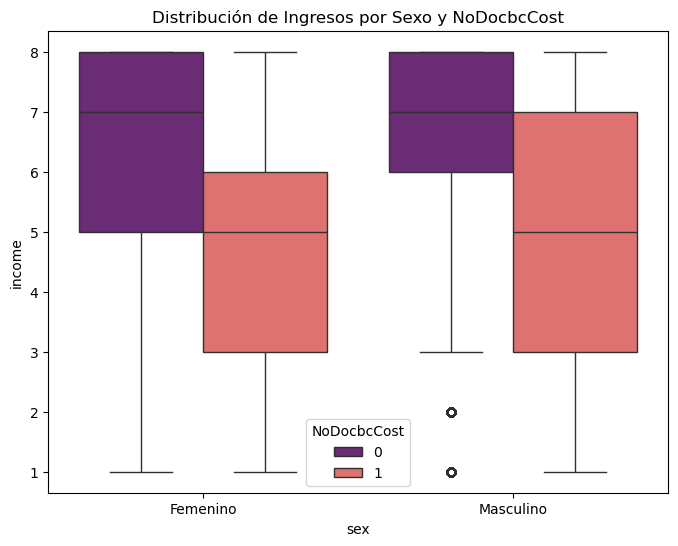

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='income', hue='noDocbcCost', data=datos_diabetes, palette='magma')

# Ajustar los títulos y etiquetas
plt.title('Distribución de Ingresos por Sexo y NoDocbcCost')
plt.xlabel('sex')
plt.xticks(ticks=range(len(sexo_labels)), labels=[sexo_labels[sex] for sex in sorted(sexo_labels.keys())])
plt.ylabel('income')

# Mostrar la gráfica
plt.legend(title='NoDocbcCost')

In [19]:
datos_diabetes.columns

Index(['diabetes_012', 'highBP', 'highChol', 'cholCheck', 'bmi', 'smoker',
       'stroke', 'heartDiseaseorAttack', 'physActivity', 'fruits', 'veggies',
       'hvyAlcoholConsump', 'anyHealthcare', 'noDocbcCost', 'genHlth',
       'mentHlth', 'physHlth', 'diffWalk', 'sex', 'age', 'education', 'income',
       'diabetes_01'],
      dtype='object')

<Axes: >

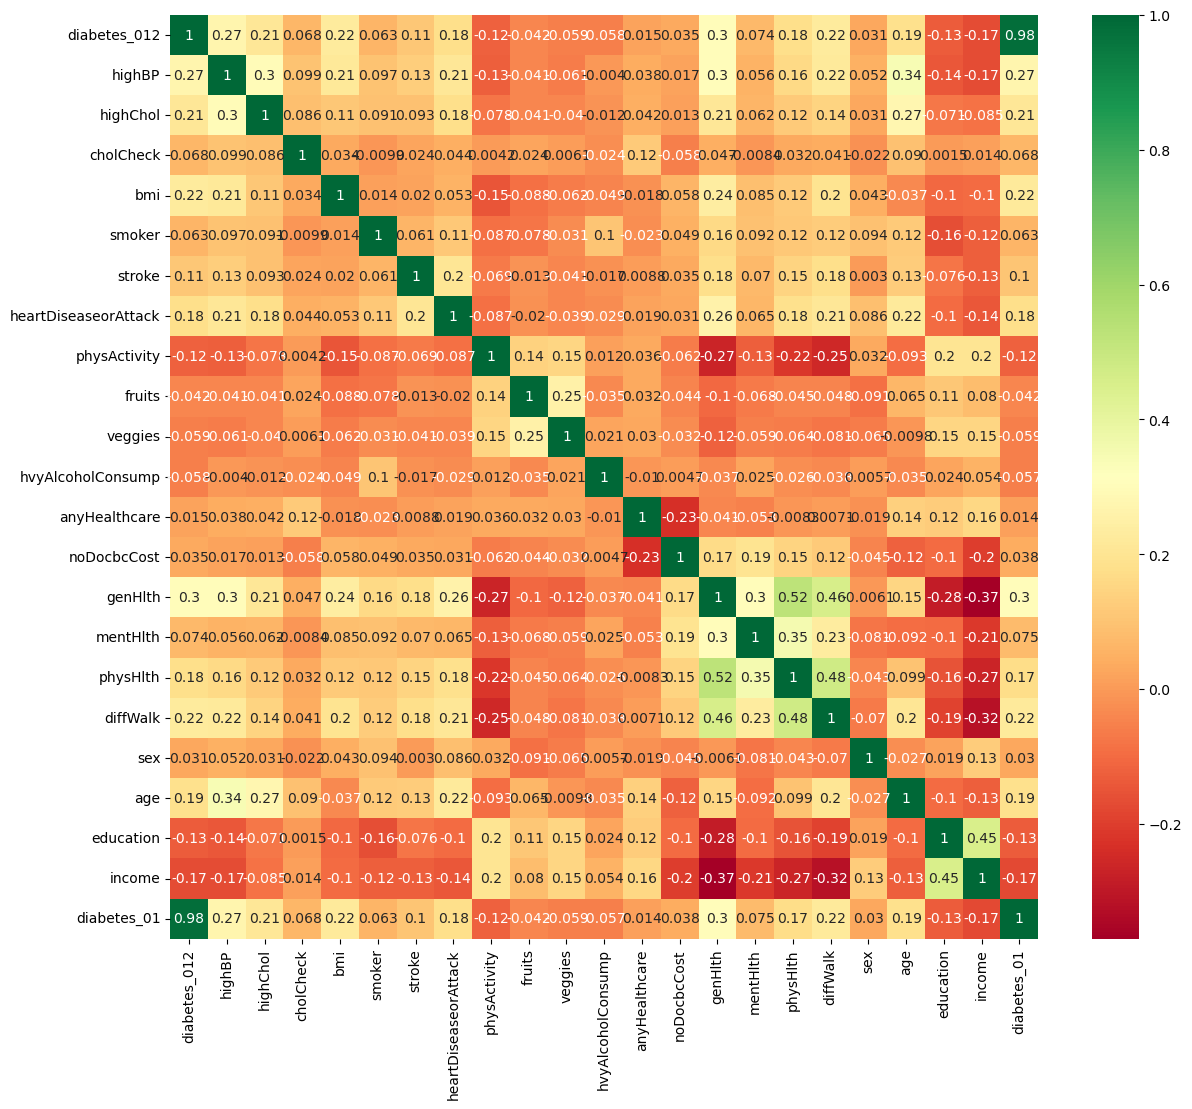

In [20]:

correlacion = datos_diabetes.corr()

correlacion
plt.figure(figsize=(14, 12)) 


sns.heatmap(correlacion, annot=True, cbar=True, cmap="RdYlGn")

<Axes: >

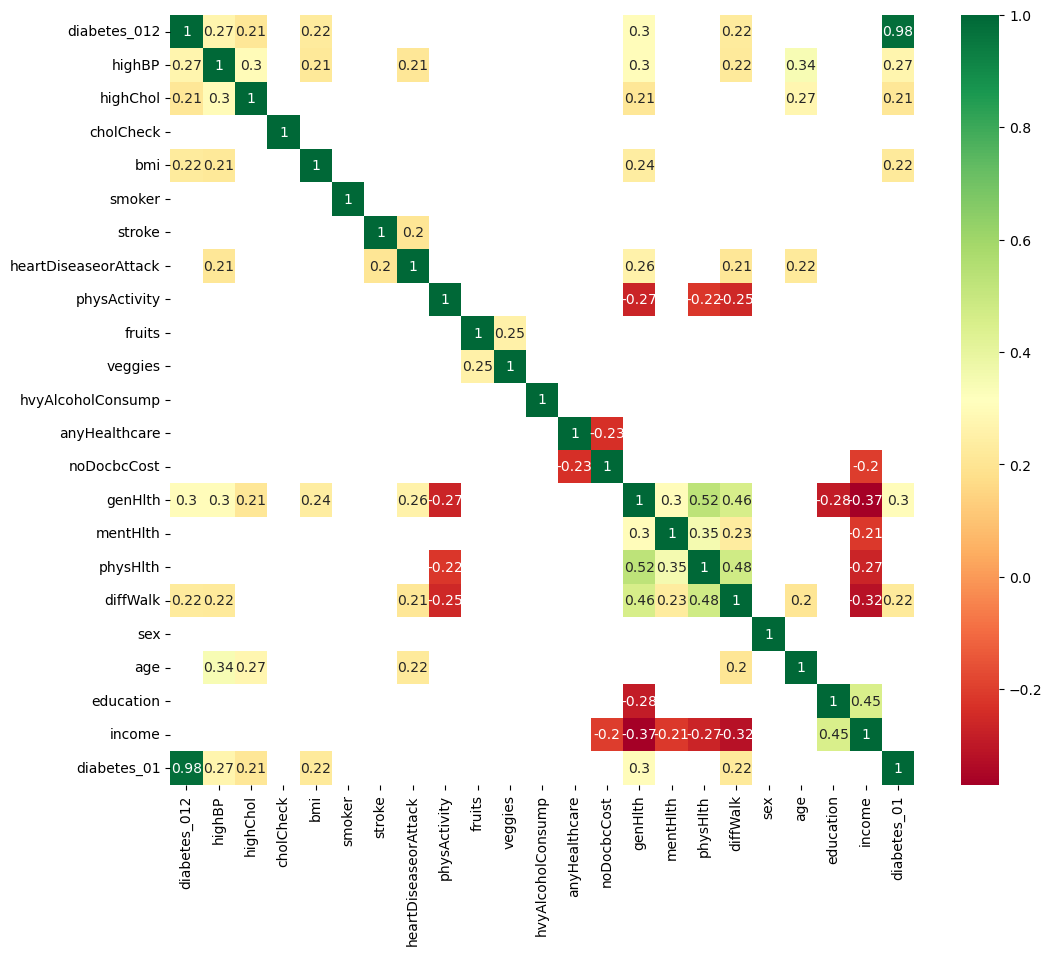

In [21]:

rango_a = 0.2
rango_b = -0.2

# Aplicar filtro
filtro = (correlacion >= rango_a) | (correlacion <= rango_b)
correlacion_filtrada = correlacion.where(filtro)

# matriz de correlación filtrada
plt.figure(figsize=(12, 10)) 
sns.heatmap(correlacion_filtrada, annot=True, cbar=True, cmap="RdYlGn")

Variables más correlacionadas ($correlacion > \left|0.3\right| $):

*PhysHlth y  GenHlth: 0.52

*PhysHlth y MentHlth: 0.34

*PhysHlth y DiffWalk: 0.47

*GenHlth y DiffWalk: 0.45

*Income y Education: 0.42

*Income y GenHlth: -0.33

*Income y DiffWalk: -0.3

*Age vs HighBP: 0.34


In [22]:
#Ordenamos el valor absoluto del coeficiente de correlacion de diabetes con las variables predictoras, para ver las mas coorelacionadas.
#abs(correlacion['diabetes']).sort_values(ascending=False)
print("Correlación de diabetes VS las demas varialbles, Ordenadas por su valor absoulo.")
abs(correlacion['diabetes_01']).sort_values(ascending=False)


Correlación de diabetes VS las demas varialbles, Ordenadas por su valor absoulo.


diabetes_01             1.000000
diabetes_012            0.983304
genHlth                 0.300785
highBP                  0.270334
bmi                     0.223851
diffWalk                0.222155
highChol                0.210290
age                     0.185891
heartDiseaseorAttack    0.176933
physHlth                0.174948
income                  0.172794
education               0.131803
physActivity            0.121392
stroke                  0.104800
mentHlth                0.074971
cholCheck               0.067879
smoker                  0.062778
veggies                 0.059219
hvyAlcoholConsump       0.056682
fruits                  0.042088
noDocbcCost             0.038025
sex                     0.029606
anyHealthcare           0.014079
Name: diabetes_01, dtype: float64

In [23]:
#Eliminare physHlth y mentHlth del dataset, ya que, junto con GenHlth son variables muy subjetivas (opinion del paciente sobre su salud)
#Conservare genHlth.
datos_diabetes.drop(columns=['physHlth', 'mentHlth'], inplace=True)

#Histogramas de las variables mas correlacionadas:

In [24]:
#Histograma BMI
#verificar que coeficiente de correlacion usa cuando tengo variables binarias

columnas_mas_correlacionadas = ['genHlth', 'highBP', 'bmi', 'diffWalk', 'highChol','age', 'heartDiseaseorAttack','income',
                                'education', 'physActivity', 'stroke', 'cholCheck',
                                'hvyAlcoholConsump','diabetes_01']
subset = datos_diabetes[columnas_mas_correlacionadas] #crear el subset de columnas de la lista


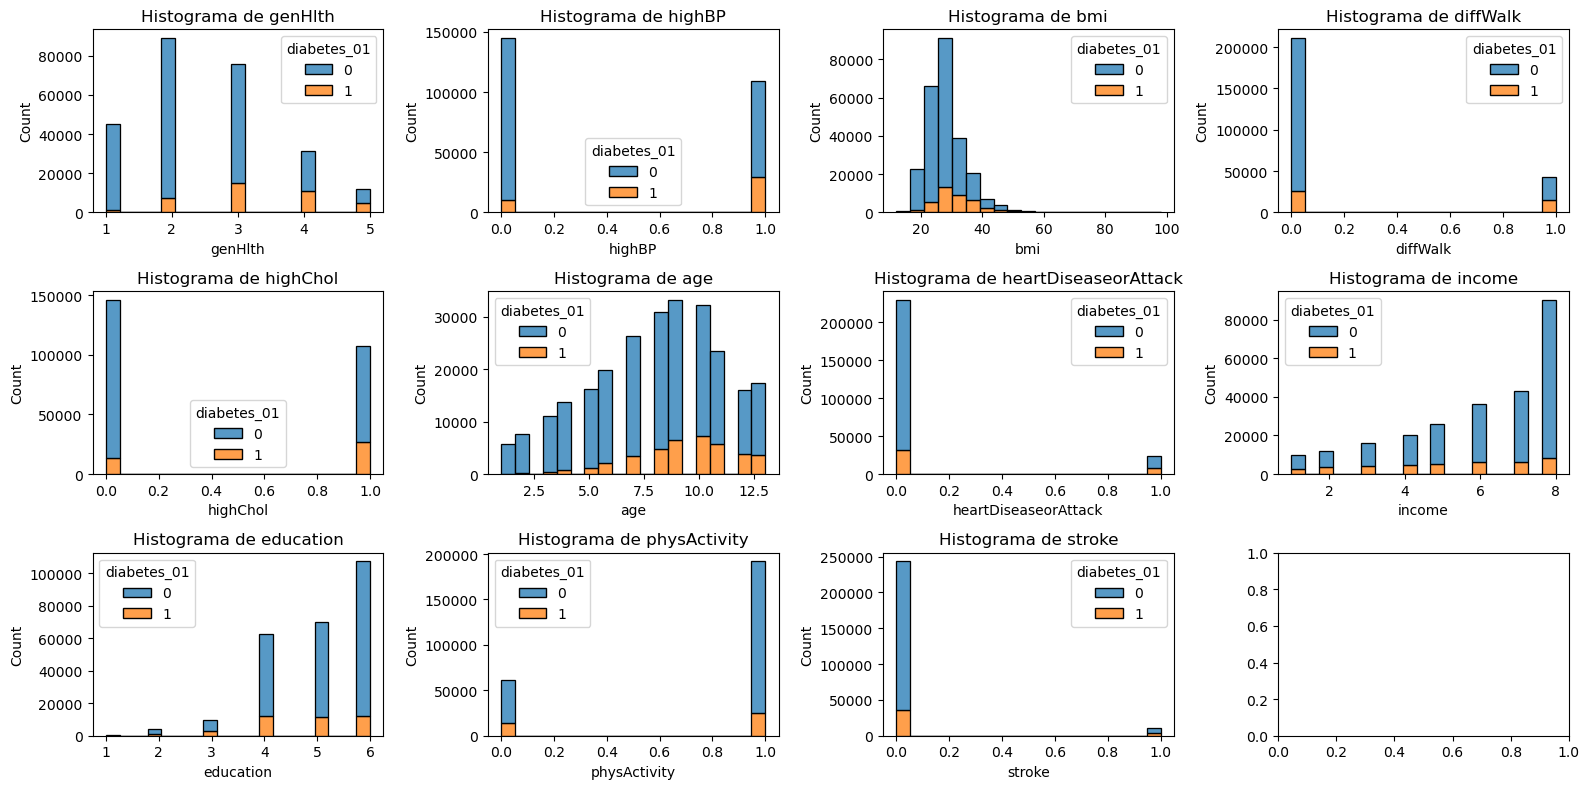

In [25]:
#seleccion de las columnas con mayor correlación.
columnas_para_histograma = ['genHlth', 'highBP', 'bmi', 'diffWalk', 'highChol', 'age', 'heartDiseaseorAttack', 'income','education', 'physActivity', 'stroke']

num_filas = 3
num_columnas = (len(columnas_para_histograma) + 1) // num_filas
fig, axes = plt.subplots(nrows=num_filas, ncols=num_columnas, figsize=(16, 8))

axes = axes.flatten()

for i, col in enumerate(columnas_para_histograma):
    data = subset[col].astype(int)
    k = int(np.ceil(1 + np.log2(len(data))))  # Regla de Sturges
    
    sns.histplot(data=subset, x=col, hue='diabetes_01', bins=k, ax=axes[i], multiple='stack')
    axes[i].set_title(f'Histograma de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout() ##no sobreponer las leyendas
plt.show()

Observaciones:

*GenHlth: Más personas con evaluacion de 3 tienen diabetes en comparacion con las peor evaluadas en salud general.

*Income, Education: A mayor ingresos, y educacion, mas positivos.

*BMI:parece que las medias de bmi entre pacientes positivos y negativos es igual.

In [26]:
#La media de BMI entre los positivos y negativos es la misma?
bmi_sin_diabetes = datos_diabetes[datos_diabetes['diabetes_01'] == 0]['bmi']
bmi_con_diabetes = datos_diabetes[datos_diabetes['diabetes_01'] == 1]['bmi']

print(f'BMI promedio de pacientes sin diabetes:{bmi_sin_diabetes.mean()}')
print(f'BMI promedio de pacientes con diabetes:{bmi_con_diabetes.mean()}')



BMI promedio de pacientes sin diabetes:27.742521162548023
BMI promedio de pacientes con diabetes:31.80273657352978


In [27]:
from scipy import stats as st

est = np.std(bmi_sin_diabetes)/len(bmi_sin_diabetes)
equalvar =  abs((np.var(bmi_sin_diabetes)-np.var(bmi_con_diabetes))/(np.var(bmi_sin_diabetes)+np.var(bmi_con_diabetes)))*100
print('Diferencia porcentual de las varianzas de las poblaciones',equalvar,'%')
# AL ser menor del 20%, se aplica la prueba de t de Student.
alpha = 0.05  # el nivel de significancia estadística crítica
results = st.ttest_ind(bmi_sin_diabetes, bmi_con_diabetes) # realizar una prueba

#p-value: la probabilidad de ver el valor de la estadistica tan extremo como se calcula en las muestras.
print('Valor p: {:.10f}'.format(results.pvalue))

if results.pvalue < alpha: # comparar el valor p con el umbral
    print("Rechazamos la hipótesis nula") #se rechaza que las medias de ambas poblaciones sean iguales
else:
    print("No podemos rechazar la hipótesis nula")#no hay suficiente evidencia para rechazar la hipotesis nula

print('Por lo tanto, la media de BMI de los pacientes con diabtes y sin diabetes debe ser distinta.' )


Diferencia porcentual de las varianzas de las poblaciones 15.615621108187128 %
Valor p: 0.0000000000
Rechazamos la hipótesis nula
Por lo tanto, la media de BMI de los pacientes con diabtes y sin diabetes debe ser distinta.


In [28]:
#Mejores caracteristicas usando un test de chi2

from sklearn.feature_selection import SelectKBest, chi2

X = datos_diabetes.drop(["diabetes_01", "diabetes_012"], axis=1)
y = datos_diabetes["diabetes_01"]

chi2_selector = SelectKBest(chi2, k=10)  
chi2_selector.fit_transform(X, y)


chi2_scores = chi2_selector.scores_
chi2_pvalues = chi2_selector.pvalues_
columns = X.columns

selected_features_chi2 = columns[chi2_selector.get_support()]
chi2_results = pd.DataFrame({
    "Feature": selected_features_chi2,
    "Chi2 Score": chi2_scores[chi2_selector.get_support()],
    "P-value": chi2_pvalues[chi2_selector.get_support()]
})

chi2_results = chi2_results.sort_values(by="Chi2 Score", ascending=False)
# Mostrar solo las características seleccionadas

chi2_results
#selected_features_chi2


,Feature,Chi2 Score,P-value
2,bmi,19560.690483,0.000000e+00
0,highBP,10585.790180,0.000000e+00
6,genHlth,10433.067217,0.000000e+00
7,diffWalk,10413.686810,0.000000e+00
8,age,10180.585970,0.000000e+00
4,heartDiseaseorAttack,7193.573093,0.000000e+00
1,highChol,6460.310201,0.000000e+00
9,income,5366.985070,0.000000e+00
3,stroke,2673.124819,0.000000e+00
5,physActivity,910.094531,6.271977e-200


In [29]:
# Eliminación Recursiva de Características RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


selector = RFE(estimator=LogisticRegression(solver='liblinear'), n_features_to_select=10)
selector.fit(X, y)

# Obtener las características seleccionadas
selected_features = columns[selector.support_]

print('Caracteristicas más importantes:')
selected_features

#X_selected = X.loc[:, selector.support_]


Caracteristicas más importantes:


Index(['highBP', 'highChol', 'cholCheck', 'heartDiseaseorAttack', 'fruits',
       'hvyAlcoholConsump', 'genHlth', 'diffWalk', 'sex', 'age'],
      dtype='object')

PCA transforma el espacio de los datos originales a un nuevo sistema de coordenadas , ejes o vectores los cuales se denominan componentes principales. El primer componente captura la mayor varianza de los datos (su direccion apunta hacia donde los datos contienen mayor varianza), el segundo componente captura la mayor varianza restante, y así sucesivamente. Los componentes primcipales son ortogonales entre sí, es decir, no estan correlacionados entre sí. 

Los eigenvectores de la matriz de covarianza son los componentes principales, y se ordenan por medio de los eigenvalores, de mayor a menor.

In [30]:
# https://ekamperi.github.io/mathematics/2020/11/01/principal-component-analysis-lagrange-multiplier.html
#Análisis de componentes principales.
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calcular la varianza explicada acumulada
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Determinar el número óptimo de componentes que expliquen al 
# menos el 95% de la varianza
optimal_components = np.argmax(explained_variance_ratio >= 0.95) + 1

print(f"Número óptimo de componentes: {optimal_components}")


Número óptimo de componentes: 18


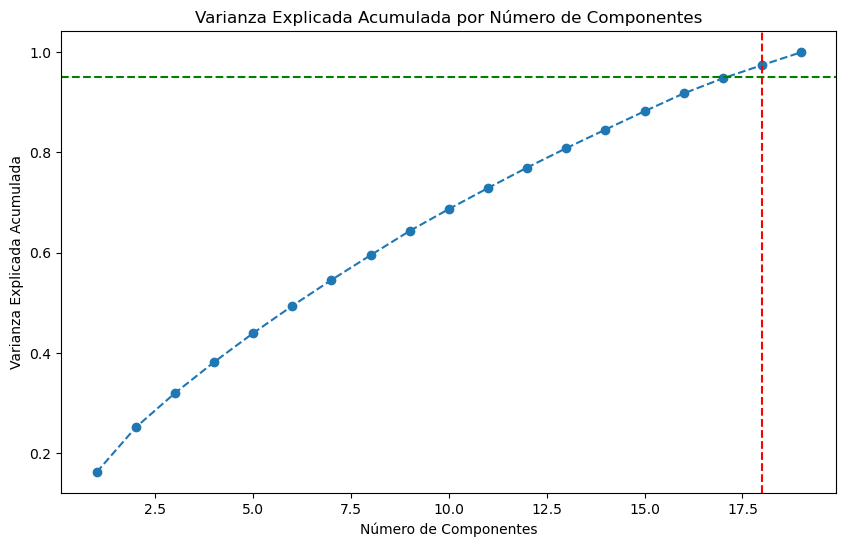

In [31]:
# Graficar la varianza explicada acumulada
plt.figure(figsize=(10, 6))
plt.plot(
    range(1, len(explained_variance_ratio) + 1),
    explained_variance_ratio,
    marker="o",
    linestyle="--",
)
plt.xlabel("Número de Componentes")
plt.ylabel("Varianza Explicada Acumulada")
plt.title("Varianza Explicada Acumulada por Número de Componentes")
plt.axvline(optimal_components, color="r", linestyle="--")
plt.axhline(0.95, color="g", linestyle="--")
plt.show()

In [32]:
# Aplicar PCA con el número óptimo de componentes
pca_optimal = PCA(n_components=optimal_components)
X_pca_optimal = pca_optimal.fit_transform(X_scaled)

# Crear un DataFrame con las características transformadas
pca_df = pd.DataFrame(
    data=X_pca_optimal, columns=[f"PC{i+1}" for i in range(optimal_components)]
)

# Mostrar el DataFrame con las características transformadas
print(pca_df)


             PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0       4.210979 -0.316712  0.022287 -1.367859 -0.099346  1.798452  0.323081   
1       0.718320 -6.090051  0.595288  2.831036  0.664227 -1.623317 -0.883887   
2       3.265096 -0.951851  0.829765 -1.384378  0.672150  0.563809  0.266767   
3      -0.002405  0.472627  1.338916 -0.471351 -0.959998  0.034823 -1.339777   
4       0.103589  1.325319  1.357164 -0.247546 -0.460460  0.098940 -1.543707   
...          ...       ...       ...       ...       ...       ...       ...   
253675  0.445719  0.678538 -0.889635 -1.679353  2.611954  1.081643  0.209222   
253676  3.805005 -0.656766 -0.263272 -1.459979 -2.813105 -0.345373 -0.995609   
253677 -1.195687 -1.807584  0.424056 -1.362996 -1.157127 -0.850568 -0.202838   
253678  0.789172 -0.421265  0.550202 -0.475848 -0.423919 -0.305826 -0.433221   
253679  1.268321  1.260473  0.331716 -0.088036 -0.345325 -1.608964 -0.838094   

             PC8       PC9      PC10   

En este caso, el metodo de PCA nos arroja que para describir el 95% de la varianza de  nuestro conjunto de datos, necesitamos 19 componentes principales, reduciendo 3 dimensiones nuestro conjunto de datos.

In [33]:


# Ejemplo de un nuevo registro 
#new_record = np.array([[value1, value2, ..., valueN]])

# Estandarizar el nuevo registro
#new_record_scaled = scaler.transform(new_record)

# Aplicar PCA al nuevo registro
#new_record_pca = pca_optimal.transform(new_record_scaled)

# Hacer la predicción
#prediction = model.predict(new_record_pca)
#print(f"Predicción para el nuevo registro: {prediction}")

In [34]:
##Utilizar un clasificador supervizado para asignar importancia a las caracteristicas.

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Entrenar el modelo ExtraTreesRegressor
model = ExtraTreesClassifier(n_estimators=100, random_state=42) ##ensamble de 100 arboles
model.fit(X_train, y_train)

ExtraTreesClassifier(random_state=42)

In [35]:
# Obtener las importancias de las características

##Significado de importacia: reduccion de indice gini de cada caracteristica.
importances = model.feature_importances_

# Crear un DataFrame con las características y sus importancias
feature_importances = pd.DataFrame({"Feature": X.columns, "Importance": importances})

# Ordenar las características por importancia
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

# Mostrar las características más importantes
print(feature_importances)

                 Feature  Importance
3                    bmi    0.273033
16                   age    0.153913
18                income    0.114556
17             education    0.085074
13               genHlth    0.077313
0                 highBP    0.051713
8                 fruits    0.029003
4                 smoker    0.028602
14              diffWalk    0.027313
1               highChol    0.026591
15                   sex    0.023058
9                veggies    0.022837
7           physActivity    0.019697
6   heartDiseaseorAttack    0.017205
12           noDocbcCost    0.016742
5                 stroke    0.012009
11         anyHealthcare    0.009861
10     hvyAlcoholConsump    0.007282
2              cholCheck    0.004197


Número óptimo de características: 11


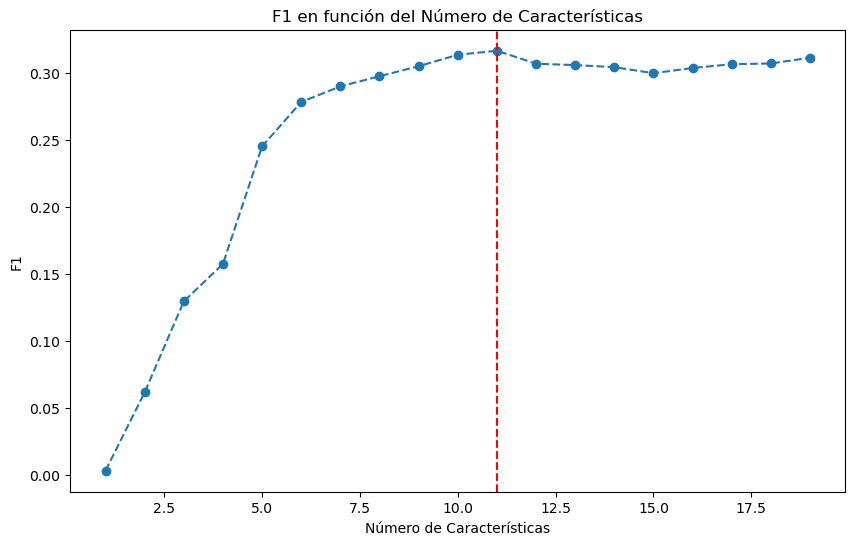

In [ ]:
# Ahora evaluaremos le modelo de ensamble variando el numero de caracteristicas para evaluar su rendimiento.
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
results = []
for i in range(1, len(feature_importances) + 1):
    selected_features = feature_importances["Feature"][:i]
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    f1 = f1_score(y_test, y_pred)
    acc= accuracy_score(y_test, y_pred)
    results.append((i, f1, acc))

# Convertir los resultados a un DataFrame
results_df = pd.DataFrame(results, columns=["Number of Features", "F1", "Accuracy"])

# Encontrar el número óptimo de características
optimal_features = results_df.loc[results_df["F1"].idxmax(), "Number of Features"]
print(f"Número óptimo de características: {optimal_features}")

# Graficar el ECM en función del número de características
plt.figure(figsize=(10, 6))
plt.plot(
    results_df["Number of Features"], results_df["F1"], marker="o", linestyle="--"
)
plt.xlabel("Número de Características")
plt.ylabel("F1")
plt.title("F1 en función del Número de Características")
plt.axvline(optimal_features, color="r", linestyle="--")
plt.show()

# Guarda el df con la importancia 
feature_importances.to_csv('feature_importances_extratreeclassificator.csv', index=False)

# Guarda el df con los resultados de MSE
results_df.to_csv('results_extratreeclassificator.csv', index=False)


                 Feature  Importance
3                    bmi    0.189343
18                income    0.129339
16                   age    0.124020
17             education    0.099839
0                 highBP    0.077428
13               genHlth    0.061025
8                 fruits    0.043673
4                 smoker    0.043416
7           physActivity    0.038890
9                veggies    0.035718
15                   sex    0.029773
14              diffWalk    0.026548
12           noDocbcCost    0.022446
5                 stroke    0.018270
6   heartDiseaseorAttack    0.017377
1               highChol    0.016492
11         anyHealthcare    0.012955
10     hvyAlcoholConsump    0.008560
2              cholCheck    0.004889


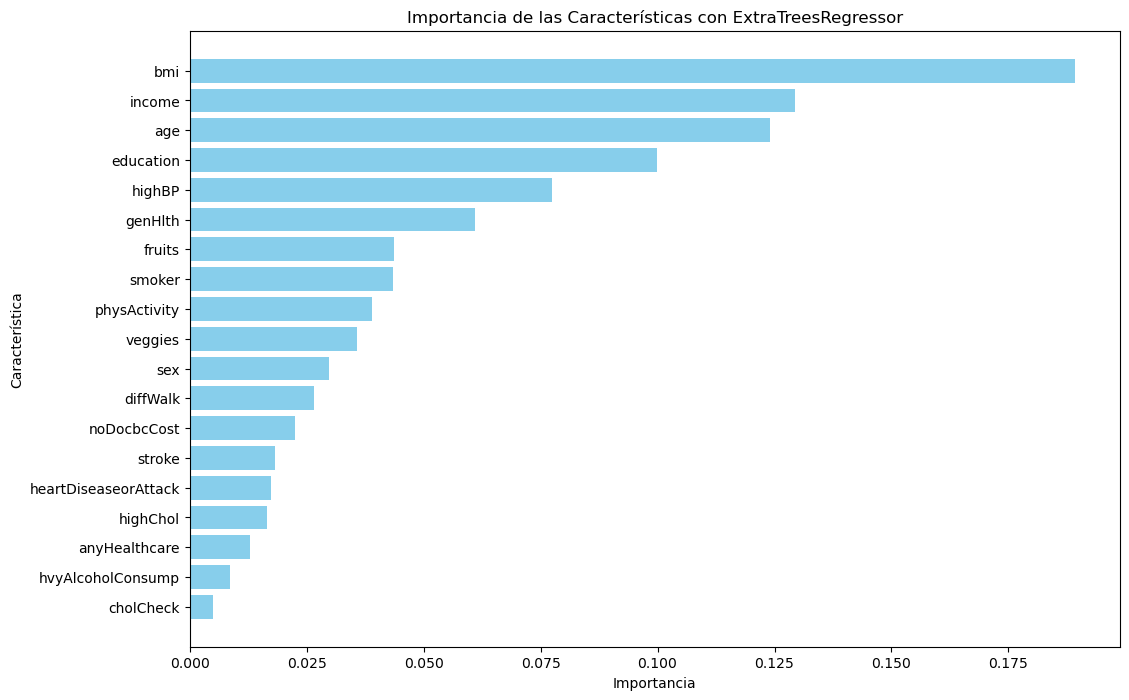

Número óptimo de características: 3


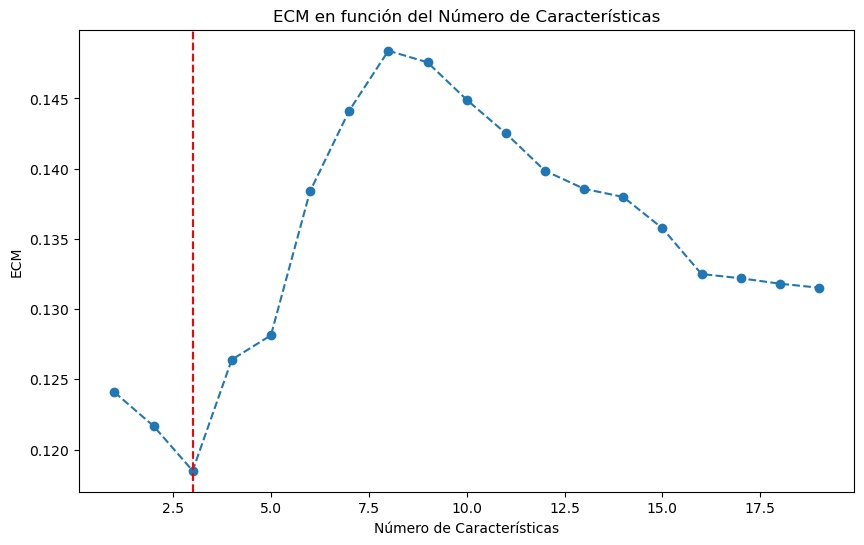

In [37]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Entrenar el modelo ExtraTreesRegressor
model = ExtraTreesRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Obtener las importancias de las características
importances = model.feature_importances_

# Crear un DataFrame con las características y sus importancias
feature_importances = pd.DataFrame({"Feature": X.columns, "Importance": importances})

# Ordenar las características por importancia
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

# Mostrar las características más importantes
print(feature_importances)

# Graficar las importancias de las características
plt.figure(figsize=(12, 8))
plt.barh(
    feature_importances["Feature"], feature_importances["Importance"], color="skyblue"
)
plt.xlabel("Importancia")
plt.ylabel("Característica")
plt.title("Importancia de las Características con ExtraTreesRegressor")
plt.gca().invert_yaxis()
plt.show()

# Evaluar el modelo utilizando diferentes números de características
results = []
for i in range(1, len(feature_importances) + 1):
    selected_features = feature_importances["Feature"][:i]
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    mse = mean_squared_error(y_test, y_pred)
    results.append((i, mse))

# Convertir los resultados a un DataFrame
results_df = pd.DataFrame(results, columns=["Number of Features", "MSE"])

# Encontrar el número óptimo de características
optimal_features = results_df.loc[results_df["MSE"].idxmin(), "Number of Features"]
print(f"Número óptimo de características: {optimal_features}")

# Graficar el ECM en función del número de características
plt.figure(figsize=(10, 6))
plt.plot(
    results_df["Number of Features"], results_df["MSE"], marker="o", linestyle="--"
)
plt.xlabel("Número de Características")
plt.ylabel("ECM")
plt.title("ECM en función del Número de Características")
plt.axvline(optimal_features, color="r", linestyle="--")
plt.show()

# Guarda el df con la importancia 
feature_importances.to_csv('feature_importances_extratreeregressor.csv', index=False)

# Guarda el df con los resultados de MSE
results_df.to_csv('results_extratreeregressor.csv', index=False)